In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [3]:
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
prev = df['review'].loc[1]
prev

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [5]:
label_encoder = LabelEncoder()

df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment,encoded_sentiment
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [6]:
def remove_special_characters(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d', ' ', text) 
  
    return text

df['review'] = df['review'].apply(remove_special_characters)

In [7]:
df['tokens'] = df['review'].apply(word_tokenize)

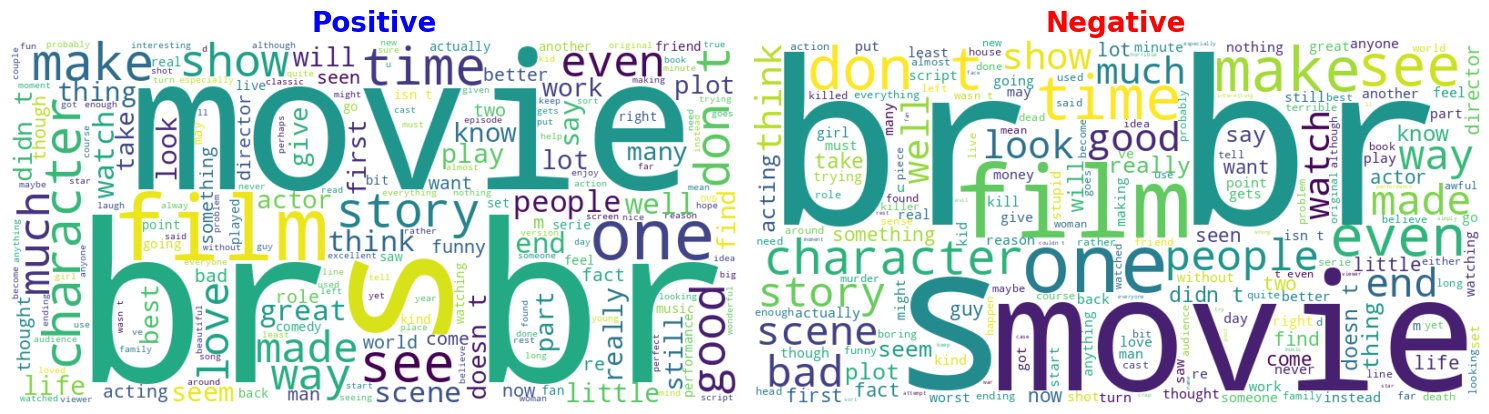

In [8]:
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(review):
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the review column
df['sentiment'] = df['review'].apply(get_sentiment)

# Filter out neutral reviews
df = df[df['sentiment'] != 'Neutral']

# Tokenize the reviews
df['tokens'] = df['review'].apply(word_tokenize)

# Function to generate word cloud
def generate_wordcloud(tokens):
    flat_tokens = [token for sublist in tokens for token in sublist]
    text = ' '.join(flat_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'Positive']['tokens']
negative_reviews = df[df['sentiment'] == 'Negative']['tokens']

# Plot the word clouds
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Check and generate word cloud for positive reviews
if not positive_reviews.empty:
    positive_wordcloud = generate_wordcloud(positive_reviews)
    axs[0].imshow(positive_wordcloud, interpolation='bilinear')
    axs[0].set_title('Positive', fontsize=20, fontweight='bold', color='blue')
    axs[0].axis('off')
else:
    axs[0].text(0.5, 0.5, 'No Positive Reviews', fontsize=20, ha='center')
    axs[0].set_title('Positive', fontsize=20, fontweight='bold', color='blue')
    axs[0].axis('off')

# Check and generate word cloud for negative reviews
if not negative_reviews.empty:
    negative_wordcloud = generate_wordcloud(negative_reviews)
    axs[1].imshow(negative_wordcloud, interpolation='bilinear')
    axs[1].set_title('Negative', fontsize=20, fontweight='bold', color='red')
    axs[1].axis('off')
else:
    axs[1].text(0.5, 0.5, 'No Negative Reviews', fontsize=20, ha='center')
    axs[1].set_title('Negative', fontsize=20, fontweight='bold', color='red')
    axs[1].axis('off')

plt.tight_layout()
plt.show()

In [9]:
df['review'] = df['review'].str.lower()
sentiment_counts = df['encoded_sentiment'].value_counts()
print(sentiment_counts)

encoded_sentiment
1    24839
0    24639
Name: count, dtype: int64


In [10]:
X = df['review']
y = df['encoded_sentiment']

In [11]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

X = df['review']
y = df['encoded_sentiment']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, train_size=0.9)

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TfidfVectorizer
vec = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    strip_accents='unicode',
    use_idf=1,
    smooth_idf=1,
    sublinear_tf=1,
    binary=1,
    stop_words='english'
)

# Fit and transform the training data
X_train_vec = vec.fit_transform(X_train)

# Transform the validation data
X_valid_vec = vec.transform(X_valid)

# Check the shapes of the transformed data
print(X_train_vec.shape)
print(X_valid_vec.shape)

(44530, 274317)
(4948, 274317)


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
clf = model.fit(X_train_vec, y_train)

In [14]:
from sklearn.metrics import log_loss, accuracy_score
predictions = clf.predict(X_valid_vec)
loss = log_loss(y_valid, predictions)
print("Cross entropy loss:", loss)

score = accuracy_score(y_valid, predictions)
print("Accuracy:", score)

Cross entropy loss: 3.889917322107631
Accuracy: 0.8920776071139854


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_model.fit(X_train_vec, y_train)

# Predict using the Random Forest model
rf_predictions = rf_clf.predict(X_valid_vec)

# Evaluate the Random Forest model
rf_loss = log_loss(y_valid, rf_predictions)
rf_accuracy = accuracy_score(y_valid, rf_predictions)

print("Random Forest Cross Entropy Loss:", rf_loss)
print("Random Forest Accuracy:", rf_accuracy)

# Print the results of Logistic Regression for comparison
print("Logistic Regression Cross Entropy Loss:", loss)
print("Logistic Regression Accuracy:", score)


Random Forest Cross Entropy Loss: 5.28853928061824
Random Forest Accuracy: 0.8532740501212611
Logistic Regression Cross Entropy Loss: 3.889917322107631
Logistic Regression Accuracy: 0.8920776071139854
